<a href="https://colab.research.google.com/github/pedrogaldo/tp-chona/blob/main/tp_chona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONFIGURACIONES

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sb

In [312]:
#tamaño default de los plots
sb.set(rc={"figure.figsize":(15, 7)})
plt.figure(figsize=(15, 7), dpi=80)

<Figure size 1200x560 with 0 Axes>

<Figure size 1200x560 with 0 Axes>

IMPORTO EL HISTORIAL

In [313]:
historial_ = pd.read_csv('NetflixHistory.csv')

convertir la duracion a segundos


In [314]:
def cambia_a_segundos(tiempo):
  horas, minutos, segundos = tiempo.split(':')
  tiempo_segundos = int(horas) * 3600 + int(minutos) * 60 + int(segundos)
  return tiempo_segundos

CREO FUNCION DE FILTRADO

In [315]:
def filt_hist(disp):
  return disp not in ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']

APLICO FILTRACION

In [316]:
historial = historial_[historial_["Device Type"].apply(filt_hist)]

# EJERCICIO A

In [317]:
historial["Device Type"].value_counts().idxmax()

'Apple Apple TV 4 Apple TV'

# EJERCICIO B

In [318]:
#filtramos las peliculas en la tabla
peliculas = historial[historial.Title.str.contains('Capítulo')==False]

In [319]:
peliculas["Title"].value_counts().idxmax()

'Star Wars: El Imperio contraataca'

In [320]:
#pelicula mas larga
masLarga = peliculas['Duration'].max()
peliculas[['Title','Duration']][peliculas['Duration']==masLarga]

,Title,Duration
8127,El club de la pelea,02:20:11


# EJERCICIO C

In [321]:
#filtramos solo las series de la tabla
series = historial[historial.Title.str.contains('Capítulo')==True]
solo_series = series['Title']

In [322]:
#aplicamos la funcion que convierte el tiempo a segundos
series['Duration'] = series['Duration'].apply(cambia_a_segundos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## i-

In [323]:
#mas tiempo visto
duracion_serie = {}
nombre = ''


for Serie in series.index:
  nombre = (series['Title'][Serie].split(':'))[0]
  if nombre not in duracion_serie:
    duracion_serie[nombre] = (series['Duration'][Serie])
  else:
    duracion_serie[nombre] += (series['Duration'][Serie])

max(duracion_serie, key=duracion_serie.get)

'Cómo conocí a tu madre'

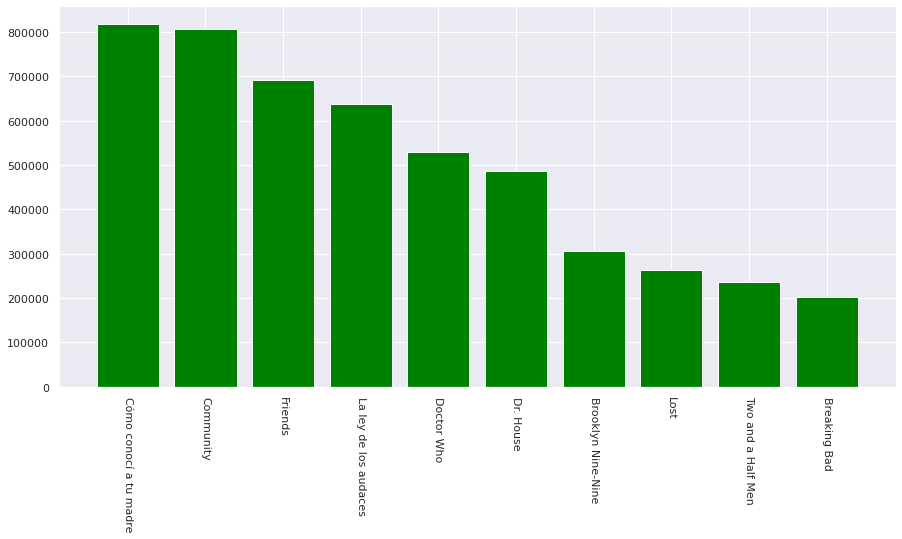

In [324]:
tiempoSerie, final = {}, {}
tiempoSerie = duracion_serie
for i in range(10):
  final[max(tiempoSerie, key=tiempoSerie.get)] = tiempoSerie[max(tiempoSerie, key=tiempoSerie.get)]
  tiempoSerie[max(tiempoSerie, key=tiempoSerie.get)] = 0
plt.bar(final.keys(), final.values(), color = 'green')
plt.xticks(rotation = -90)
plt.show()

## ii)

In [325]:
#hacemos lo mismo que antes pero con las ocurrencias de las series

ocurrencias_serie = {}

for Serie in series.index:
  nombre = (series['Title'][Serie].split(':'))[0]
  if nombre not in ocurrencias_serie:
    ocurrencias_serie[nombre] = 1
  else:
    ocurrencias_serie[nombre] += 1

max(ocurrencias_serie, key=ocurrencias_serie.get)

'Community'

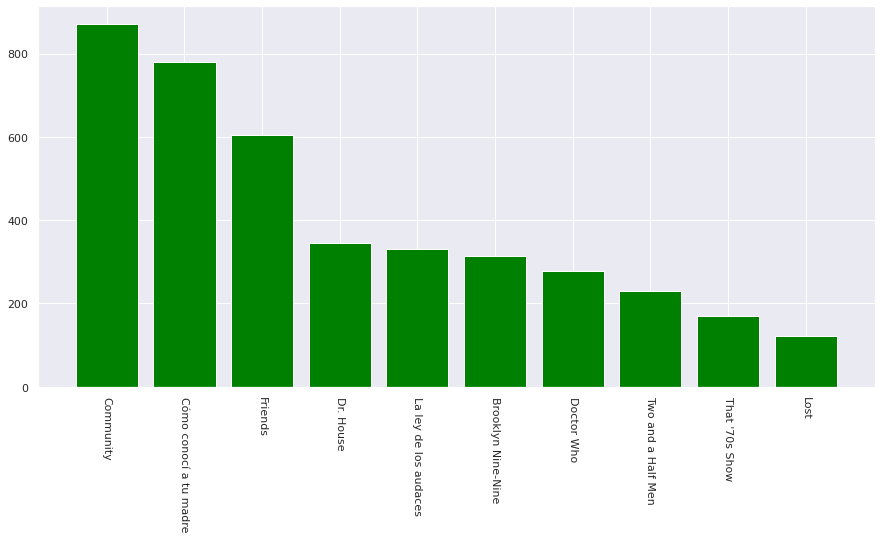

In [326]:
ocurrencias, final_oc = {}, {}
ocurrencias = ocurrencias_serie
for i in range(10):
  final_oc[max(ocurrencias, key=ocurrencias.get)] = ocurrencias[max(ocurrencias, key=ocurrencias.get)]
  ocurrencias[max(ocurrencias, key=ocurrencias.get)] = 0
plt.bar(final_oc.keys(), final_oc.values(), color = 'green')
plt.xticks(rotation = -90)
plt.show()

# EJERCICIO D

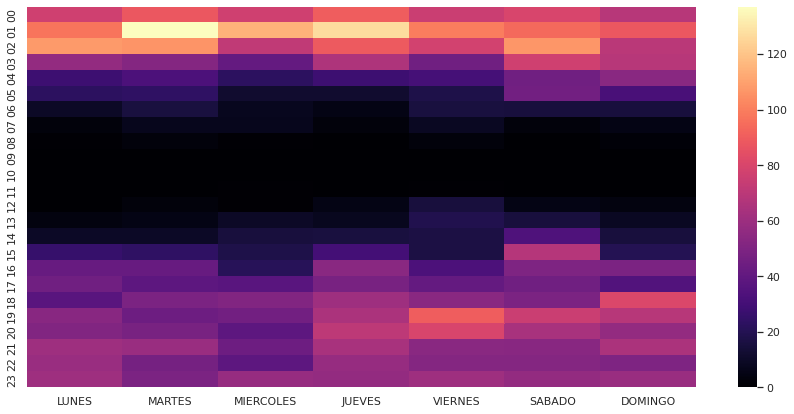

In [327]:
horas = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
dias = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']

datos = pd.DataFrame(index=horas, columns=dias)
for col in datos.columns:
    datos[col].values[:] = 0

for day in historial['Start Time']:
  dia = (day.split('-'))[0]+ '-' +(day.split('-'))[1]+ '-' +((day.split('-'))[2]).split()[0]
  dia = datetime.strptime(dia, "%Y-%m-%d") #usamos objeto datetime
  dia = dias[dia.weekday()]
  hora = ((day.split('-')[2]).split()[1]).split(':')[0]
  datos[dia][hora] += 1

datos = datos.astype(np.float64)
ax = sb.heatmap(datos, cmap='magma')

# EJERCICIO E

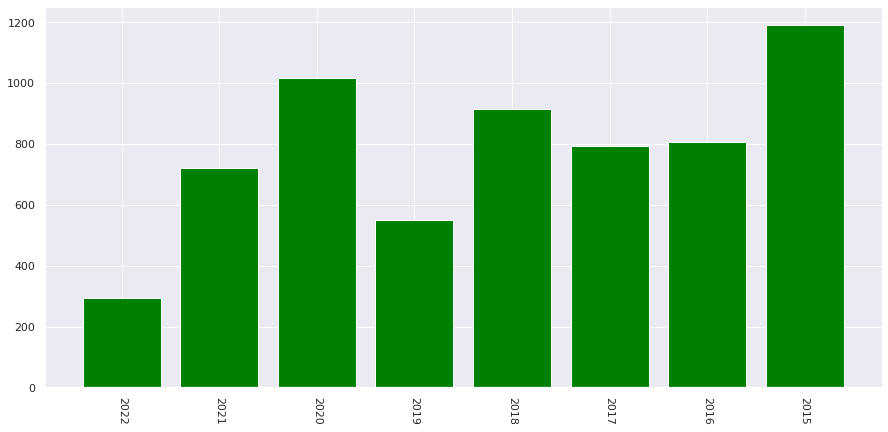

In [329]:
cant_anios = {}

for title in historial.index:
  anios = (historial['Start Time'][title].split('-'))[0]
  if anios not in cant_anios:
    cant_anios[anios] = 1
  else:
    cant_anios[anios] += 1

plt.bar(cant_anios.keys(), cant_anios.values(), color = 'green')
plt.xticks(rotation = -90)
plt.show()

# EJERCICIO F

In [332]:
historial['Duration'] = historial['Duration'].apply(cambia_a_segundos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [334]:
tiempo_en_segundos = historial['Duration'].sum()
t_en_mins = (tiempo_en_segundos / 60)
t_en_hs = (t_en_mins/60)
t_en_dias = (t_en_hs/24)

t_en_dias

99.78094907407409